# K-means with `scikit-learn`


# 1. First example

In [325]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
X = np.array([[1, 3], [1, 4], [1, 0],[9, 2], [12, 5], [10, 0]])
print(X)

[[ 1  3]
 [ 1  4]
 [ 1  0]
 [ 9  2]
 [12  5]
 [10  0]]


In [326]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_


array([1, 1, 1, 0, 0, 0])

In [328]:
kmeans.predict([[1, 0], [11, 3],[2,5]])


array([1, 0, 1])

In [329]:
kmeans.cluster_centers_

array([[10.33333333,  2.33333333],
       [ 1.        ,  2.33333333]])

# 2. Clustering for spherical groups 

In [330]:
mu1, sigma1 = 0, 0.1
mu2, sigma2 = 1,0.3
m1, s1 = -1,0.4
m2, s2= 2, 0.2
X1= np.random.normal(mu1, sigma1, 1000)
X2= np.random.normal(mu2, sigma2, 1000)
Y1= np.random.normal(m1, s1, 1000)
Y2= np.random.normal(m2, s2, 1000)
Z1= np.random.normal(m1, s2, 1000)
Z2= np.random.normal(mu2, sigma1, 1000)
V1=np.concatenate((X1,Y1,Z1))
V2=np.concatenate((X2,Y2,Z2))
X=pd.DataFrame({'V1':V1,'V2':V2})
X.shape

(3000, 2)

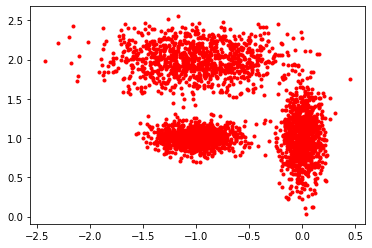

In [331]:
plt.plot(V1,V2,'r.')

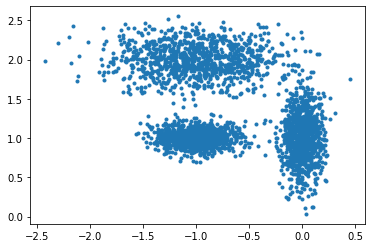

In [332]:
plt.scatter(V1,V2,marker='.')

In [333]:
kmeans = KMeans(n_clusters=3, init='random',n_init=1).fit(X)
kmeans.labels_

array([1, 1, 1, ..., 2, 2, 2])

In [334]:
centro=kmeans.cluster_centers_
centro

array([[-1.01046343,  2.00892535],
       [-0.00477072,  1.02216481],
       [-0.9994126 ,  1.00231971]])

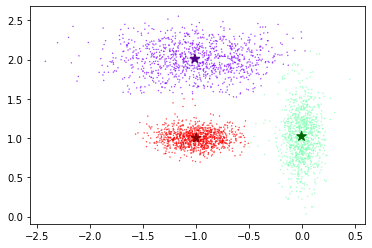

In [335]:
plt.scatter(V1,V2,c=kmeans.labels_, cmap='rainbow',marker='.',s=0.5)
plt.scatter(centro[:,0],centro[:,1],c=['indigo','darkgreen','darkred'],marker='*',s=100)

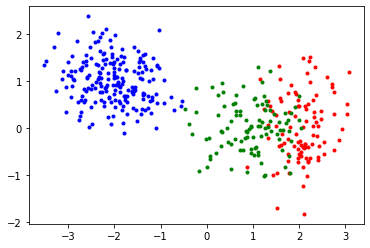

In [444]:
mu1, sigma1 = 2, 0.5
mu2, sigma2 = 0,0.7
m1, s1 = -2,0.6
m2, s2= 1, 0.5
X1= np.random.normal(mu1, sigma1, 100)
X2= np.random.normal(mu2, sigma2, 100)
Y1= np.random.normal(m1, s1, 200)
Y2= np.random.normal(m2, s2, 200)
Z1= np.random.normal(m2, s1, 100)
Z2= np.random.normal(mu2, sigma1,100)
V1=np.concatenate((X1,Y1,Z1))
V2=np.concatenate((X2,Y2,Z2))
X=pd.DataFrame({'V1':V1,'V2':V2})
co=np.append(np.append(np.full(shape=100,fill_value=0),np.full(shape=100,fill_value=1)),np.full(shape=100,fill_value=2))
plt.scatter(X1,X2,marker='.',c='r')
plt.scatter(Y1,Y2,marker='.',c='b')
plt.scatter(Z1,Z2,marker='.',c='g')

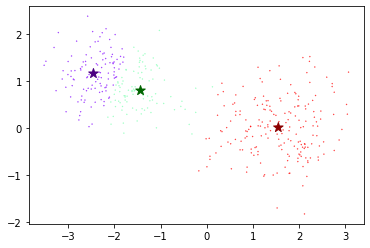

In [452]:
kmeans = KMeans(n_clusters=3, init='random',n_init=1).fit(X)
kmeans.labels_
centro=kmeans.cluster_centers_
plt.scatter(V1,V2,c=kmeans.labels_, cmap='rainbow',marker='.',s=0.5)
plt.scatter(centro[:,0],centro[:,1],c=['indigo','darkgreen','darkred'],marker='*',s=100)

# 3. Clustering for Iris data

Here, we use again the Iris Data Set.

<ipython-input-459-35fc6351ed80>:58: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


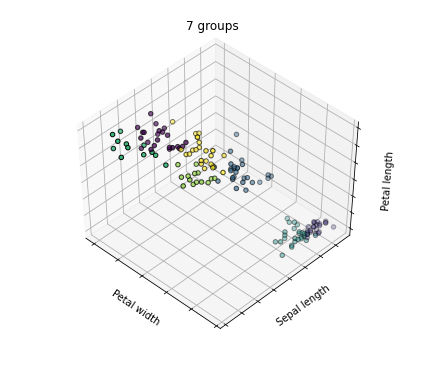

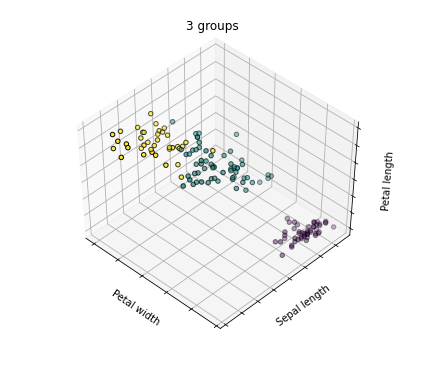

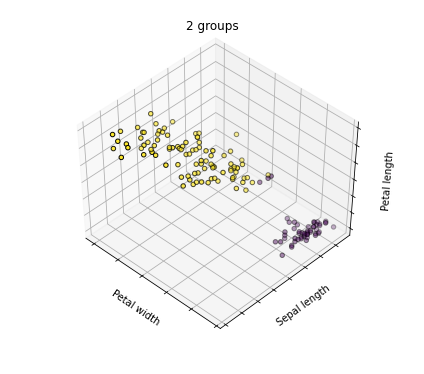

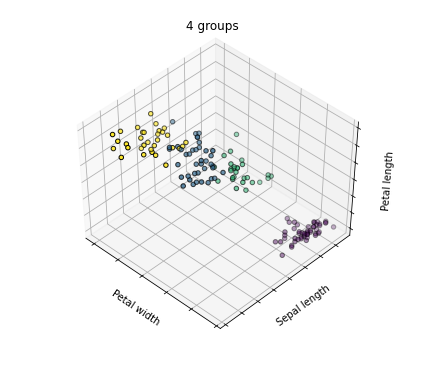

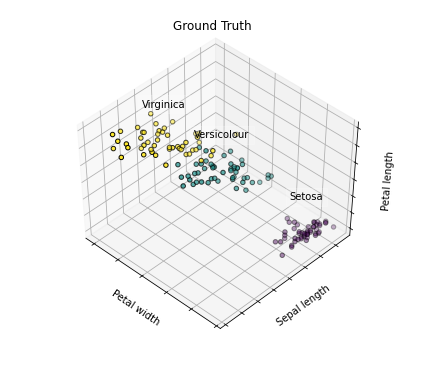

In [459]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

methodo = [('k_means_iris_7', KMeans(n_clusters=7)),('k_means_iris_3', KMeans(n_clusters=3)),
           ('k_means_iris_2', KMeans(n_clusters=2)),('k_means_iris_4', KMeans(n_clusters=4))]

fignum = 1
titles = ['7 groups', '3 groups', '2 groups', '4 groups']
for name, est in methodo:
    fig = plt.figure(fignum, figsize=(6, 5))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(6, 5))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

# 4. Selecting the number of clusters

Different methods have been proposed in the literature for selecting the number k of groups.
Some of them are based on the idea that even if an increase in the number of groups always mechanically reduces the distortion, it does not decrease as strongly when artificial groups are created as when the data gets clustered into real underlying classes.
Based on this idea, we may compute the distortion obtained for a grid of values of k, and then try to identify an elbow when plotting the distortion as a function of k.

Write a function allowing to plot the distortion curve and apply it to the previous examples.

# 5. Several simulated data sets

Download the simulated data sets available on Moodle: losanges, noeud, rectexp, boulebil, saturne, anneaux. Try the k-means algorithm on this data for the real number k of classes and visualise the clusters in colors. For the plot, note that these observations are in dimension 2 or dimension 3.
In which cases does the algorithm provide the expected result ? When the result is not satisfactory,
increase k over time to better understand what conditions seem to be required for a good performance of the method.

Try the algorithm for the observations circles3 and circles3bis, and then propose and implement a method to find the expected groups.

Visualize the mystery data using the first two coordinates, and then perform k-means, using the method coded above for selecting the number of clusters. Comment on the result and find an explanation.

# 6. Other distances for clustering

Write a mahal.kmeans function which takes as argument a covariance matrix A and implements the k-means algorithm in the case where the distortion measure is the Mahalanobis distance
associated with A, i.e. the distance defined by $d(x, y) = (x-y)^TA^{-1}(x-y)$. Simulate several datasets using non-spherical Gaussian distributions to illustrate the fact 
that a Mahalanobis distance is better suited to clustering such data as the Euclidean distance. Check that the best distance is the one corresponding to the covariance matrix of the 
observations.